In [1]:
%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

import os
from itertools import product
import heapq
import re

import pandas as pd
import numpy as np

from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

from IPython import display
from matplotlib import pyplot as plt

from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, f1_score, average_precision_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from fuzzywuzzy.fuzz import ratio, token_set_ratio, token_sort_ratio, partial_ratio

/Users/fritshermans/opt/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [9]:
from datasets import load_data
from deduplipy.active_learning import ActiveStringMatchLearner
from deduplipy.string_matcher import StringMatcher
from deduplipy.blocking import Blocking
from deduplipy.clustering import hierarchical_clustering
from deduplipy.deduplicator import Deduplicator

In [10]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 500)
pd.set_option('display.max_colwidth', 200)

## Load data 

In [11]:
X_train, X_test, y_train, y_test = load_data()

## StringMatcher

In [12]:
myStringMatcher = StringMatcher().fit(X_train, y_train)

In [13]:
myStringMatcher.score(X_train, y_train)

0.9837837837837838

In [14]:
myStringMatcher.score(X_test, y_test)

0.9785932721712537

In [15]:
average_precision_score(y_train, myStringMatcher.predict_proba(X_train)[:,1])

0.9990433373118611

In [16]:
average_precision_score(y_test, myStringMatcher.predict_proba(X_test)[:,1])

0.9981285609580194

## Active learning

In [17]:
n_initial = 2

In [18]:
X_initial, X_pool, y_initial, y_pool = train_test_split(X_train, y_train, train_size=n_initial, stratify=y_train)

In [19]:
StringMatcher().fit(X_initial, y_initial).score(X_test, y_test)

0.9693251533742332

In [20]:
StringMatcher().fit(X_train, y_train).score(X_test, y_test)

0.9785932721712537

In [21]:
myActiveLearner = ActiveStringMatchLearner(X_initial, y_initial, n_queries=20)

In [22]:
myActiveLearner.fit(X_pool)


1/20 [0.37043145 0.37043145 0.37043145 0.37043145]
Is this a match?
-> bayer aktiengesellschaft kaiser wilhelm allee 1 51368 leverkusen germany
-> bayerische motoren werke aktiengesellschaft munich germany


 n



2/20 [0.44888092 0.49723671 0.37540726 0.35727449]
Is this a match?
-> koninklijke ahold delhaize n v   provincialeweg 11
-> koninklijke ahold delhaize n v   1506 ma zaandam netherlands


 y



3/20 [0.41694916 0.53838827 0.4081766  0.3221992 ]
Is this a match?
-> enel spa rome italy
-> enel spa viale regina margherita  137 rm 00198 italy


 y



4/20 [0.31284712 0.5872638  0.59876436 0.16399827]
Is this a match?
-> bnp paribas sa 16 boulevard des italiens paris france
-> l air liquide s a  paris france


 n



5/20 [0.38691641 0.41270623 0.77704694 0.18713427]
Is this a match?
-> safran sa paris france
-> societe generale societe 75009 paris france


 n



6/20 [0.36680521 0.40577643 0.79611023 0.29100795]
Is this a match?
-> telefonica  s a  28050 madrid
-> telefonica  s a  ronda de la comunicacion


Wrong input!


 y



7/20 [0.4353277  0.4024043  0.73054195 0.35914345]
Is this a match?
-> societe generale societe 29  boulevard haussmann 75009 paris france
-> safran sa 2  boulevard du general martial valin paris france


 n



8/20 [0.42492489 0.4949911  0.80006407 0.21847267]
Is this a match?
-> enel spa viale regina margherita  137 rm 00198 italy
-> enel spa rome italy


 y



9/20 [0.20655871 0.50444879 1.02240506 0.11647177]
Is this a match?
-> engie sa 1  place samuel de champlain 92400 france
-> engie sa 92400 courbevoie france


 y



10/20 [0.12773074 0.31256318 1.15578762 0.2346231 ]
Is this a match?
-> bayerische motoren werke aktiengesellschaft petuelring 130 munich germany
-> allianz se munich germany


 n



11/20 [0.35457947 0.04470868 1.17973182 0.40413684]
Is this a match?
-> bayerische motoren werke aktiengesellschaft petuelring 130 munich germany
-> siemens aktiengesellschaft werner von siemens strasse 1 80333 munich germany


 n



12/20 [0.24564951 0.10808514 1.26709258 0.34641941]
Is this a match?
-> safran sa paris france
-> l air liquide s a  paris france


 n



13/20 [ 0.00147828 -0.00373441  1.32730966  0.48780563]
Is this a match?
-> bnp paribas sa 16 boulevard des italiens 75009 france
-> bnp paribas sa paris


 y



14/20 [-0.03193764  0.13578529  1.44206713  0.2345448 ]
Is this a match?
-> danone s a  75439 paris
-> orange s a  75015 paris france


 n



15/20 [-0.05347175  0.02033137  1.51285424  0.06869688]
Is this a match?
-> nokia corporation karakaari 7
-> nokia corporation 2610 espoo finland


 y



16/20 [-0.05683801 -0.00430005  1.52714788  0.13513429]
Is this a match?
-> total s a  paris
-> orange s a  78  rue olivier de serres 75015 paris france


 n



17/20 [0.03877815 0.14592466 1.50814801 0.33770077]
Is this a match?
-> nokia corporation 2610 espoo finland
-> nokia corporation karakaari 7


 y



18/20 [0.04465383 0.13910041 1.53299525 0.40476634]
Is this a match?
-> total s a  92078 france
-> total s a  paris


 y



19/20 [0.12291763 0.15819587 1.57436063 0.39720245]
Is this a match?
-> total s a  paris
-> total s a  92078 france


 y



20/20 [0.18818085 0.17451591 1.61787695 0.39215224]
Is this a match?
-> l air liquide s a  75007 paris france
-> total s a  paris


 n


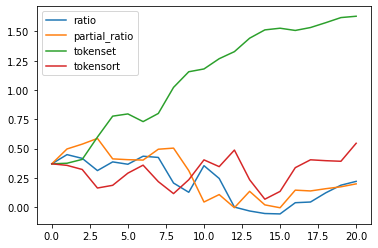

In [23]:
plt.plot(np.vstack(myActiveLearner.parameters));
plt.legend(['ratio', 'partial_ratio', 'tokenset', 'tokensort']);

## Blocking

In [26]:
X_training = myActiveLearner.learner.X_training
y_training = myActiveLearner.learner.y_training

In [ ]:
myBlocking = Blocking('col').fit(X_training, y_training)

In [ ]:
myBlocking.rules_selected

In [20]:
pairs_table = myBlocking.transform(X_pool[:,0])
pairs_table.head(2)

,col_1,fingerprint,col_2
0,axa sa 75008 paris,axa:0,axa sa 75008 paris
1,axa sa 75008 paris,axa:0,axa sa 25 avenue matignon 75008 paris france


## Scoring

In [21]:
scored_pairs_table = pairs_table.copy()

In [22]:
scored_pairs_table['score'] = myActiveLearner.predict_proba(pairs_table[['col_1', 'col_2']].values)[:,1]

In [23]:
scored_pairs_table.loc[scored_pairs_table.col_1==scored_pairs_table.col_2, 'score'] = 1

In [24]:
scored_pairs_table.head(2)

,col_1,fingerprint,col_2,score
0,axa sa 75008 paris,axa:0,axa sa 75008 paris,1.000000
1,axa sa 75008 paris,axa:0,axa sa 25 avenue matignon 75008 paris france,0.947042


## Hierarchical clustering

In [25]:
df_clusters = hierarchical_clustering(scored_pairs_table)
df_clusters.head()

,cluster_id
axa sa 75008 paris france,1
axa sa 25 avenue matignon 75008 paris france,1
axa sa 75008 paris,1
koninklijke ahold delhaize n v provincialeweg 11 netherlands,4
koninklijke ahold delhaize n v provincialeweg 11,4


## All in one

In [28]:
myDedupliPy = DedupliPy(X_initial, y_initial, 'col', 10)

In [29]:
myDedupliPy.fit(X_pool)


1/10 [0.37043145 0.37043145 0.37043145 0.37043145]
Is this a match?
-> kering sa 40 rue de sevres 75007 paris france
-> danone s a  15  rue du helder 75439 paris france


 n



2/10 [0.41807234 0.42253714 0.42253714 0.42253714]
Is this a match?
-> bayer aktiengesellschaft
-> bayer aktiengesellschaft kaiser wilhelm allee 1 51368 leverkusen germany


 y



3/10 [0.16271274 0.64216409 0.64216409 0.20962991]
Is this a match?
-> engie sa 92400 courbevoie france
-> engie sa 1  place samuel de champlain 92400 courbevoie


 y



4/10 [0.07452531 0.48512594 0.80120663 0.28560806]
Is this a match?
-> enel spa viale regina margherita  137 rm 00198 italy
-> enel spa rome italy


 y



5/10 [-0.07746085  0.39995106  0.98035451  0.1948263 ]
Is this a match?
-> orange s a  paris
-> danone s a  15  rue du helder paris france


 n



6/10 [0.03996665 0.5007947  0.96397957 0.18770859]
Is this a match?
-> total s a  paris
-> total s a  92078 france


 y



7/10 [0.11283307 0.50241045 0.96791081 0.15897382]
Is this a match?
-> bnp paribas sa 16 boulevard des italiens paris france
-> safran sa paris france


 n



8/10 [0.20311939 0.51248289 0.86047588 0.42107952]
Is this a match?
-> bnp paribas sa paris
-> bnp paribas sa 16 boulevard des italiens 75009 france


 y



9/10 [0.23397488 0.62684923 0.90968298 0.2002819 ]
Is this a match?
-> nokia corporation 2610 espoo finland
-> nokia corporation karakaari 7


 y



10/10 [0.26820591 0.60637701 0.89777728 0.30246147]
Is this a match?
-> nokia corporation karakaari 7
-> nokia corporation 2610 espoo finland


 y


In [31]:
res = myDedupliPy.predict(X_pool)
res.head()

,cluster_id
axa sa 75008 paris france,1
axa sa 25 avenue matignon 75008 paris france,1
axa sa 75008 paris,1
koninklijke philips n v amstelplein 2 1096 bc amsterdam,4
koninklijke philips n v amstelplein 2 1096 bc netherlands,4
